# Dataset: Bank Marketing

Fonte oficial do dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Dados: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

Arquivos incluídos no link acima:
<ul>
    <li>bank.csv: uma versão reduzida do conjunto de dados;</li>
    <li>bank-full.csv: o conjunto completo;</li>
    <li>bank-names.txt: com a descrição dos campos do conjunto de dados.</li>
</ul>
       

Para a resolução deste teste utilize o arquivo bank-full.csv e para uma descrição sobre o dataset use bank-names.txt e/ou a fonte oficial.

### Questões

<ol>
    <li>Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?</li>
    <li>Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?</li>
    <li>Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?</li>
    <li>O resultado da campanha anterior tem relevância na campanha atual?</li>
    <li>Qual o fator determinante para que o banco exija um seguro de crédito?</li>
    <li>Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?</li>

-------------------------------------------------------------------------------------------------------------------------

Primeiramente iremos carregar os dados do arquivo <i>bank_full.csv</i> no DataFrame `bank_full`, sendo utilizado a biblioteca `pandas`.

In [1]:
import pandas as pd
import numpy as np

In [4]:
# carregando o arquivo bank_full.csv no dataframe bank_full e imprimindo uma amostra
bank_full = pd.read_csv('bank/bank-full.csv', sep=';')
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Conferindo os tipos definidos para cada coluna durante o carregamento.

In [6]:
bank_full.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Conferindo dimensões do data frame.

In [7]:
bank_full.shape

(45211, 17)

Uma vez carregado vamos conferir a existência de entradas NaN.

In [5]:
bank_full.isnull().any().any()

False

Pronto! Dados carregados e prontos para utilização. Deste modo, daqui em diante vamos responder as questões sugeridas.

## Questão 1

<b>Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?</b>

Para isto será buscado, dentro de cada profissão, quais pessoas já apresentam algum empréstimo (colunas housing e loan), obtendo-se a porcentagem com relação ao número total de cada profissão. Os valores serão tomados com relação a cada profissão e não ao valor total de pessoas, evitando que profissões mais numerosas levem uma vantagem numérica a qual não estamos interessados na análise.

In [145]:
# calculadora de porcentagens de empréstimos já existentens (housing OU loan) para cada profissão
# identifica e imprime o máximo encontrado
jobs = bank_full.job.unique()
porcentagemMax=0
for i in jobs:
    yes = bank_full.job[(bank_full.job == i) & ((bank_full.housing == 'yes') | (bank_full.loan == 'yes'))].count()
    total = bank_full.job[bank_full.job == i].count()
    porcentagem = yes/total
    print(i,': %.2f' %(porcentagem*100),'%')
    if porcentagem > porcentagemMax:
        porcentagemMax = porcentagem
        j = i
print('\nMáximo\n\t',j,': %.2f' %(porcentagemMax*100),'%')

management : 55.24 %
technician : 60.66 %
entrepreneur : 68.33 %
blue-collar : 78.08 %
unknown : 9.72 %
retired : 30.87 %
admin. : 69.02 %
services : 73.74 %
self-employed : 54.72 %
unemployed : 45.20 %
housemaid : 39.52 %
student : 27.40 %

Máximo
	 blue-collar : 78.08 %


A profissão que apresenta a maior porcentagem é a blue-collar. Agora vamos verificar, dentro desta profissão, qual o tipo de financiamento que é mais feito. Para isso será considerado, primeiramente, apenas os financiamentos residenciais, seguido pelos empréstimos pessoais e concluindo com as pessoas que possuem os dois simultaneamente.

In [48]:
# apenas empréstimos residenciais
bank_full.job[(bank_full.job == 'blue-collar') & (bank_full.housing == 'yes') & (bank_full.loan == 'no')].count()

5915

In [49]:
# apenas empréstimos pessoais
bank_full.job[(bank_full.job == 'blue-collar') & (bank_full.housing == 'no') & (bank_full.loan == 'yes')].count()

551

In [50]:
# empréstimos pessoais mais residenciais
bank_full.job[(bank_full.job == 'blue-collar') & (bank_full.housing == 'yes') & (bank_full.loan == 'yes')].count()

1133

Concluida a análise acima se obtém que para os profissionais blue-collor o tipo de empréstimo mais efetuado é o residencial.

## Questão 2

<b>Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?</b>

Primeiramente deve-se contar o número total de contatos e comparar com o número de empréstimos obtidos na campanha.

In [151]:
# contagem do número total de empréstimos efetuados.
yes = bank_full[bank_full.y == 'yes'].shape

In [152]:
# porcentagem do número total de empréstimos efetuados com relação ao número de contatos
print('Empréstimos efetuados: %.2f' %(yes[0]/bank_full.shape[0]*100),'%')

Empréstimos efetuados: 11.70 %


Do número total de contatos, um percentual de 11,70 efetuou um epréstimo durante a campanha. Porém, vamos dar uma olhada como a aprovação se deu em cada mês.

Porém, podemos ir um pouco mais além e observar, mês a mês, qual deles apresenta um maior índice de empréstimos conseguidos através da campanha.

In [251]:
# contagem de empréstimos efetuados a cada mês
mes = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
mes_count = []
for i in mes:
    count = 0
    for j in range(bank_full.shape[0]):
        if bank_full.month[j] == i:
            count+=1
    mes_count.append(count)

In [252]:
# verificando a lista criada
mes_count

[1403, 2649, 477, 2932, 13766, 5341, 6895, 6247, 579, 738, 3970, 214]

In [253]:
# transformando a lista mes em dataframe
mes = pd.DataFrame(mes)

In [254]:
# adicionando a mes as contagens de cada mes em forma de porcentagem
mes['count'] = mes_count
mes['count'] = mes['count']/(mes['count'].sum())*100

In [255]:
# transformando a coluna com o nome dos meses em index
mes.set_index(0, inplace=True)
del mes.index.name

Text(0.5,1,'Porcentagem de empréstimos por mês')

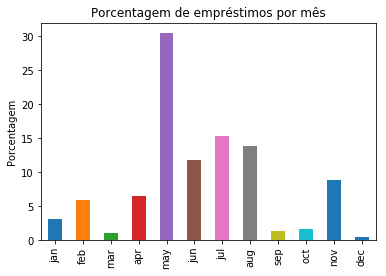

In [256]:
# fazendo um plot de barras com as porcentagem de cada mês
mes['count'].plot.bar()
plt.ylabel('Porcentagem')
plt.title('Porcentagem de empréstimos por mês')

Claramente no gráfico acima observa-se que o mês de Maio é o mais propício para se ter sucesso no empréstimo, sendo uma forte sugestão que, para o próximo ano, a campanha seja intensificada neste mês.

## Questão 3

<b>Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?</b>

Para responder a esta questão deve-se criar um dataframe apenas com os resultados positivos da campanha e analisar a coluna que indica o número de ligações.

In [88]:
# criando dataframe com entradas apenas positivas de empréstimo
yes = bank_full[bank_full.y == 'yes']
yes.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354
std,13.497781,3501.104777,8.501875,392.525262,1.921826,118.822266,2.553272
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,-1.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,-1.000000,0.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,98.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,854.000000,58.000000


Para facilitar a visualização dos dados acima, será plotado um histograma com a distribuição do número de ligações feitas para cada cliente que fez um empréstimo.

In [141]:
import matplotlib

In [89]:
# criando variável com o número de ligações durante a campanha
ligacoes = yes.campaign

In [92]:
ligacoes.describe()

count    5289.000000
mean        2.141047
std         1.921826
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: campaign, dtype: float64

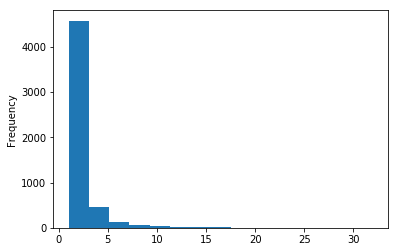

In [226]:
# plotando um histograma com a distribuição do número de ligações na campanha
ligacoes.plot.hist(bins=15)

A média do número de ligações necessárias para se obter um empréstimo foi de ~2 ligações.

Como a intenção é otimizar o número de ligações, 3 ligações já serão suficientes para conquistar 75% dos clientes que fizeram um empréstimo.

Utilizando-se do conceito de uma distribuição Gaussiana (Normal) onde tomado a média +- 2\*desvio_padrão atinge-se ~99,5% dos dados, um limite de ~6 (2,14 + 2\*1,92) ligações é um máximo aceitável.

## Questão 4

<b>O resultado da campanha anterior tem relevância na campanha atual?</b>

Para responder a esta questão, primeiramente precisamos saber o número total de empréstimos conseguidos durante esta campanha. Feito isto segue-se para uma contagem total do número de pessoas que emprestaram na campanha passada, as quais são denominadas como 'success'. Conclui-se computando as pessoas que voltaram ou não a fazer um empréstimo.

In [94]:
# número total de empréstimos feitos na campanha
yes.shape

(5289, 17)

In [95]:
# pessoas as quais foi obtido sucesso na campanha anterior
poutcome = bank_full[bank_full.poutcome == 'success']

In [97]:
# contagem de pessoas que voltaram a fazer empréstimo ou não
poutcome_yes = poutcome.poutcome[(poutcome.poutcome == 'success') & (poutcome.y == 'yes')].count()
poutcome_no = poutcome.poutcome[(poutcome.poutcome == 'success') & (poutcome.y == 'no')].count()

In [98]:
# porcentagem dos que repetiram o empréstimo
print('Voltaram a emprestar: %.2f' %(poutcome_yes/poutcome.poutcome.count()*100),'%')

Voltaram a emprestar: 64.73 %


In [99]:
# porcentagem dos que não repetiram o empréstimo
print('Não voltaram a emprestar: %.2f' %(poutcome_no/poutcome.poutcome.count()*100),'%')

Não voltaram a emprestar: 35.27 %


In [103]:
# porcentagem dos que já emprestaram com relação ao número total de empréstimos
print('Porcentagem dos que já emprestaram do número total de empréstimos da campanha: %.2f'
      %(poutcome_yes/yes.shape[0]*100),'%')

Porcentagem dos que já emprestaram do número total de empréstimos da campanha: 18.49 %


Considerando que ~18,5% das pessoas que fizeram empréstimos nesta campanha também fizeram na campanha passada, tem-se que a campanha passada foi relevante para a campanha atual. Porém, neste caso, o valor mais importante a se observar é o de pessoas que voltaram a fazer empréstimos, 64,73%, sendo um número expressivo.

## Questão 5

<b>Qual o fator determinante para que o banco exija um seguro de crédito?</b>

O fator determinante é se a pessoa possui débitos faltantes de outros empréstimos.

In [105]:
# buscando por pessoas que possuem default e fizeram um empréstimo
default_yes = bank_full.default[(bank_full.default == 'yes') & (bank_full.y == 'yes')].count()

In [107]:
# porcentagem de default com relação ao número total de empréstimos
print('Exigir seguro de %.2f' %(default_yes/yes.shape[0]*100),'% dos empréstimos concedidos.')

Exigir seguro de 0.98 % dos empréstimos concedidos.


## Questão 6

<b>Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?</b>

Para esta pergunta deve-se tratar apenas com os dados pessoais dos clientes. Como se está interessado em empréstimos imobiliários serão selecionados, para um novo dataframe, apenas os clientes com empréstimos imobiliários.

In [163]:
# criando dataframe com pessoas com empréstimos imobiliários
imobiliario = bank_full[bank_full.housing == 'yes'].copy(deep=True)

Eliminando-se todas as colunas com exceção das de dados pessoais.

In [165]:
imobiliario.drop(labels=['housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'], axis=1, inplace=True)

In [166]:
# verificando as colunas restantes
imobiliario.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance'], dtype='object')

Para as colunas numéricas será feito um levantamento estatístico (função describe). Com relação as demais colunas serão plotados gráficos de barra para facilitar a comparação de qual entrada mais se destaca em cada coluna.

In [167]:
imobiliario.describe()

,age,balance
count,25130.000000,25130.000000
mean,39.175288,1175.103064
std,8.926807,2483.285761
min,20.000000,-4057.000000
25%,32.000000,62.000000
50%,38.000000,412.000000
75%,45.000000,1257.750000
max,78.000000,58544.000000


Text(0.5,1,'Distribuição das idades - empréstimo imobiliário')

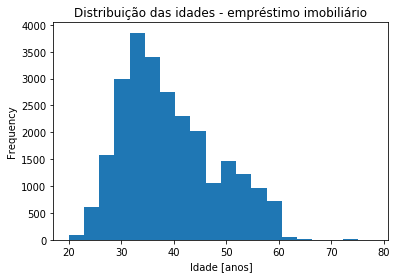

In [214]:
imobiliario.age.plot.hist(bins=20)
plt.xlabel('Idade [anos]')
plt.title('Distribuição das idades - empréstimo imobiliário')

A distribuição apresenta um bom comportamento, não sendo observado nenhuma entrada em destaque.

Para visualizar melhor a distribuição dos dados de saldos médios anuais (abaixo) serão utilizados apenas valores menores que 20000 para o histograma abaixo.

Text(0.5,1,'Distribuição dos saldos médios anuais - empréstimo imobiliário')

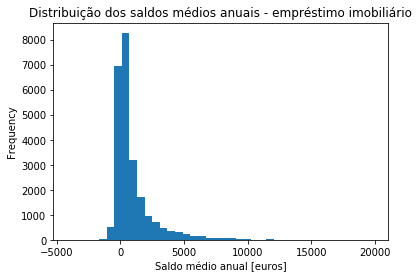

In [213]:
balance = imobiliario[imobiliario.balance < 20000]
balance.balance.plot.hist(bins=40)
plt.xlabel('Saldo médio anual [euros]')
plt.title('Distribuição dos saldos médios anuais - empréstimo imobiliário')

Neste caso, novamente, nenhum comportamento proeminente é observado.

Text(0.5,1,'Porcentagens de cada Job - empréstimo imobiliário')

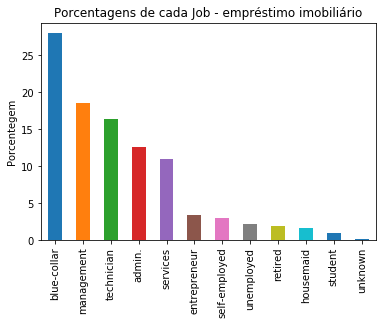

In [212]:
imo_job = imobiliario.job.value_counts()/imobiliario.shape[0]*100
imo_job.plot.bar()
plt.ylabel('Porcentegem')
plt.title('Porcentagens de cada Job - empréstimo imobiliário')

A profissão blue-collar apresenta uma porcentagem um pouco mais significativa que as demais, podendo esta ser uma característica proeminente dos que fazer empréstimos imobiliários.

Text(0.5,1,'Porcentagens de cada Education - empréstimo imobiliário')

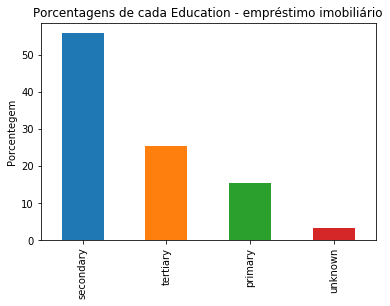

In [211]:
imo_edu = imobiliario.education.value_counts()/imobiliario.shape[0]*100
imo_edu.plot.bar()
plt.ylabel('Porcentegem')
plt.title('Porcentagens de cada Education - empréstimo imobiliário')

Neste caso, observa-se que o maior número, e significante, dos que fazem empréstimos imobiliários possuem nível escolar secundário.

Text(0.5,1,'Porcentagens de cada Marital - empréstimo imobiliário')

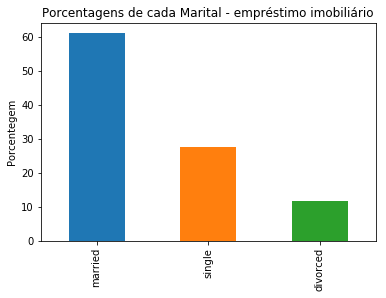

In [210]:
imo_mar = imobiliario.marital.value_counts()/imobiliario.shape[0]*100
imo_mar.plot.bar()
plt.ylabel('Porcentegem')
plt.title('Porcentagens de cada Marital - empréstimo imobiliário')

A maior porcentagem dos que fazem empréstimos imobiliários são casados, sendo esta porcentagem extremamente maior que as de solteiros e divorciados.

Text(0.5,1,'Porcentagens de cada Default - empréstimo imobiliário')

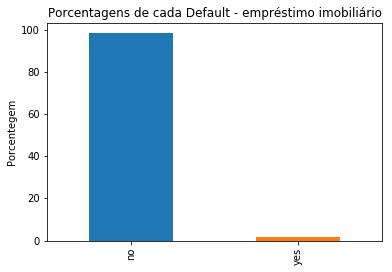

In [209]:
imo_def = imobiliario.default.value_counts()/imobiliario.shape[0]*100
imo_def.plot.bar()
plt.ylabel('Porcentegem')
plt.title('Porcentagens de cada Default - empréstimo imobiliário')

Uma porcentagem praticamente nula de pessoas que apresentam problemas de pagamento com outros empréstimos fazem empréstimos imobiliários.

A partir dos  gráficos acima observa-se que as colunas Job, Education, Marital e Default apresentam, cada uma, uma característica bem definida. Mas antes de tomarmos os resultados como conclusivos iremos replotar estes três gáficos, porém para os que possuem financiamento pessoal.

In [195]:
pessoal = bank_full[bank_full.loan == 'yes'].copy(deep=True)

Text(0.5,1,'Porcentagens de cada Job - empréstimo pessoal')

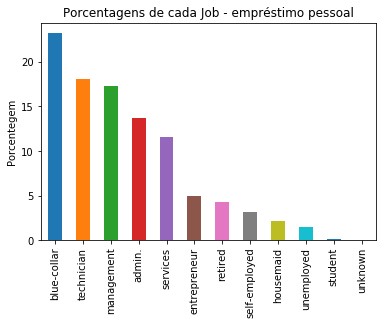

In [259]:
pes_job = pessoal.job.value_counts()/pessoal.shape[0]*100
pes_job.plot.bar()
plt.ylabel('Porcentegem')
plt.title('Porcentagens de cada Job - empréstimo pessoal')

Text(0.5,1,'Porcentagens de cada Education - empréstimo pessoal')

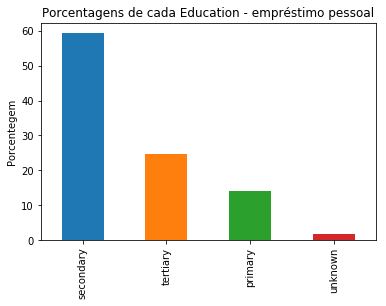

In [200]:
pes_edu = pessoal.education.value_counts()/pessoal.shape[0]*100
pes_edu.plot.bar()
plt.ylabel('Porcentegem')
plt.title('Porcentagens de cada Education - empréstimo pessoal')

Text(0.5,1,'Porcentagens de cada Marital - empréstimo pessoal')

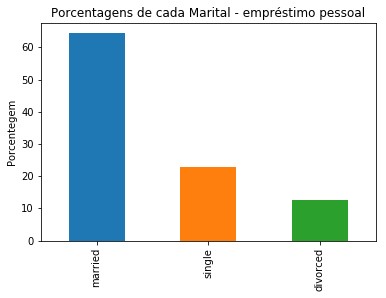

In [201]:
pes_mar = pessoal.marital.value_counts()/pessoal.shape[0]*100
pes_mar.plot.bar()
plt.ylabel('Porcentegem')
plt.title('Porcentagens de cada Marital - empréstimo pessoal')

Text(0.5,1,'Porcentagens de cada Default - empréstimo pessoal')

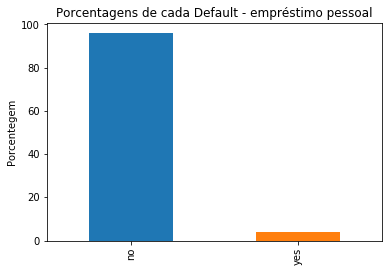

In [202]:
pes_def = pessoal.default.value_counts()/pessoal.shape[0]*100
pes_def.plot.bar()
plt.ylabel('Porcentegem')
plt.title('Porcentagens de cada Default - empréstimo pessoal')

Comparando os gráficos acima com os de imobiliários observa-se um mesmo comportamento, o que nos permite concluir que as características mais proeminentes de quem faz um empréstimo imobiliário não são exclusivas destes. Uma exceção ocorre com Jobs, onde o número de profissionais blue-collar diminui em empréstimos pessoais com relação ao imobiliário. Porém, novamente, ainda não se observa uma característica exclusiva de quem faz empréstimos imobiliários, própriamente dito.